# Homework 6, Part One: Lots and lots of questions about beer

### Do your importing and your setup

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline

## Read in the file `craftcans.csv`, and look at the first first rows

In [2]:
df = pd.read_csv("craftcans.csv", na_values=["Does not apply"])

df

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.50%,50.0
1,Maggie's Leap,NorthGate Brewing,"Minneapolis, MN",Milk / Sweet Stout,16 oz.,4.90%,26.0
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.80%,19.0
3,Pumpion,NorthGate Brewing,"Minneapolis, MN",Pumpkin Ale,16 oz.,6.00%,38.0
4,Stronghold,NorthGate Brewing,"Minneapolis, MN",American Porter,16 oz.,6.00%,25.0
5,Parapet ESB,NorthGate Brewing,"Minneapolis, MN",Extra Special / Strong Bitter (ESB),16 oz.,5.60%,47.0
6,Citra Ass Down,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,8.00%,68.0
7,London Balling,Against the Grain Brewery,"Louisville, KY",English Barleywine,16 oz.,12.50%,80.0
8,35 K,Against the Grain Brewery,"Louisville, KY",Milk / Sweet Stout,16 oz.,7.70%,25.0
9,A Beer,Against the Grain Brewery,"Louisville, KY",American Pale Ale (APA),16 oz.,4.20%,42.0


## How many rows do you have in the data? What are the column types?

In [3]:
df.shape

(2416, 7)

In [4]:
df.dtypes

Beer         object
Brewery      object
Location     object
Style        object
Size         object
ABV          object
IBUs        float64
dtype: object

# Checking out our alcohol

## What are the top 10 producers of cans of beer?

In [5]:
df.Brewery.value_counts().head(10)

Brewery Vivant                62
Oskar Blues Brewery           46
Sun King Brewing Company      38
Cigar City Brewing Company    25
Sixpoint Craft Ales           24
Hopworks Urban Brewery        23
Stevens Point Brewery         22
Great Crescent Brewery        20
21st Amendment Brewery        20
SanTan Brewing Company        19
Name: Brewery, dtype: int64

## What is the most common ABV? (alcohol by volume)

In [6]:
df.ABV.value_counts().head(1)

5.00%    215
Name: ABV, dtype: int64

## Oh, weird, ABV isn't a number. Convert it to a number for me, please.

It's going to take a few steps!

### First, let's just look at the ABV column by itself

In [7]:
df.ABV.head()

0    4.50%
1    4.90%
2    4.80%
3    6.00%
4    6.00%
Name: ABV, dtype: object

### Hm, `%` isn't part of  a number. Let's remove it.

When you're confident you got it right, save the results back into the `ABV` column.

- *Tip: In programming the easiest way to remove something is to *replacing it with nothing*.
- *Tip: "nothing" might seem like `NaN` sinc we talked about it a lot in class, but in this case it isn't! It's just an empty string, like ""*
- *Tip: `.replace` is used for replacing ENTIRE cells, while `.str.replace` is useful for replacing PARTS of cells (see my New York example)*

In [8]:
df['ABV'] = df.ABV.str.replace("%", "")
df.ABV.head()

0    4.50
1    4.90
2    4.80
3    6.00
4    6.00
Name: ABV, dtype: object

### Now let's turn `ABV` into a numeric data type

Save the results back into the `ABV` column (again), and then check `df.dtypes` to make sure it worked.

- *Tip: We used `.astype(int)` during class, but this has a decimal in it...*

In [9]:
df['ABV'] = df.ABV.astype(float)
df.ABV.head()
df.ABV.dtypes

dtype('float64')

## What's the ABV of the average beer look like?

### Show me in two different ways: one command to show the `median`/`mean`/etc, and secondly show me a chart

In [10]:
df.ABV.mean()

5.977342419080068

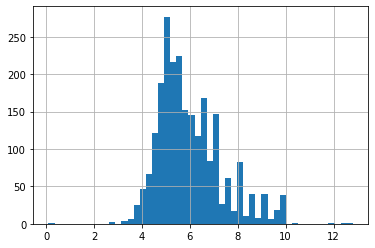

In [11]:
df.ABV.hist(bins=50)

### We don't have ABV for all of the beers, how many are we missing them from?

- *Tip: You can use `isnull()` or `notnull()` to see where a column is missing data.*
- *Tip: You just want to count how many `True`s and `False`s there are.*
- *Tip: It's a weird trick involving something we usually use to count things in a column*

In [12]:
df.ABV.isna().value_counts()

False    2348
True       68
Name: ABV, dtype: int64

In [13]:
df[df.ABV.isna() == True]

,Beer,Brewery,Location,Style,Size,ABV,IBUs
94,Bastian,James Page Brewing Company,"Stevens Point, WI",American Strong Ale,12 oz.,NaN,NaN
199,Professor Black,Blue Owl Brewing,"Austin, TX",American Stout,12 oz.,NaN,NaN
200,Little Boss,Blue Owl Brewing,"Austin, TX",American Pale Wheat Ale,12 oz.,NaN,NaN
201,Van Dayum!,Blue Owl Brewing,"Austin, TX",American Amber / Red Ale,12 oz.,NaN,NaN
202,Spirit Animal,Blue Owl Brewing,"Austin, TX",American Pale Ale (APA),12 oz.,NaN,NaN
217,U. P. Witbier,Keweenaw Brewing Company,"Houghton, MI",Witbier,12 oz.,NaN,NaN
307,Fat Paczki,Brewery Vivant,"Grand Rapids, MI",Belgian Dark Ale,16 oz.,NaN,NaN
308,Earth-Like Planets,Brewery Vivant,"Grand Rapids, MI",Belgian Pale Ale,16 oz.,NaN,NaN
324,Royal Lager,Weston Brewing Company,"Weston, MO",American Pale Lager,16 oz.,NaN,NaN
344,O’Malley’s Stout,Weston Brewing Company,"Weston, MO",English Stout,12 oz.,NaN,NaN


# Looking at location

Brooklyn used to produce 80% of the country's beer! Let's see if it's still true.

## What are the top 10 cities in the US for canned craft beer?

In [14]:
df.Location.value_counts().head(10)

Grand Rapids, MI    66
Chicago, IL         55
Portland, OR        52
Indianapolis, IN    43
San Diego, CA       42
Boulder, CO         41
Denver, CO          40
Brooklyn, NY        38
Seattle, WA         35
Longmont, CO        33
Name: Location, dtype: int64

## List all of the beer from Brooklyn, NY

In [15]:
df[df.Location == "Brooklyn, NY"]

,Beer,Brewery,Location,Style,Size,ABV,IBUs
115,4Beans,Sixpoint Craft Ales,"Brooklyn, NY",Baltic Porter,12 oz.,10.0,52.0
210,Jammer,Sixpoint Craft Ales,"Brooklyn, NY",Gose,12 oz. Slimline,4.2,16.0
246,Abigale,Sixpoint Craft Ales,"Brooklyn, NY",Belgian Pale Ale,12 oz.,8.0,NaN
404,Nomader Weiss,Evil Twin Brewing,"Brooklyn, NY",Berliner Weissbier,12 oz.,4.0,NaN
421,Rad,Sixpoint Craft Ales,"Brooklyn, NY",Fruit / Vegetable Beer,16 oz.,3.2,7.0
439,Molotov Lite,Evil Twin Brewing,"Brooklyn, NY",American Double / Imperial IPA,16 oz.,8.5,NaN
588,Bengali,Sixpoint Craft Ales,"Brooklyn, NY",American IPA,"24 oz. ""Silo Can""",6.5,62.0
713,Sensi Harvest,Sixpoint Craft Ales,"Brooklyn, NY",American Pale Ale (APA),12 oz.,4.7,50.0
969,Hi-Res,Sixpoint Craft Ales,"Brooklyn, NY",American Double / Imperial IPA,12 oz.,9.9,111.0
987,KelSo Nut Brown Lager,KelSo Beer Company,"Brooklyn, NY",Euro Dark Lager,12 oz.,5.7,19.0


## What brewery in Brooklyn puts out the most cans of beer?

In [16]:
df[df.Location == "Brooklyn, NY"].Brewery.value_counts().head(1)

Sixpoint Craft Ales    24
Name: Brewery, dtype: int64

## What are the five most popular styles of beer produced by Sixpoint?

In [17]:
df[df.Brewery == 'Sixpoint Craft Ales'].Style.value_counts().head(5)

American IPA                      4
Cream Ale                         2
Baltic Porter                     2
American Double / Imperial IPA    2
Rye Beer                          2
Name: Style, dtype: int64

## List all of the breweries in New York state.

- *Tip: We want to match *part* of the `Location` column, but not all of it.*
- *Tip: Watch out for `NaN` values! You might be close, but you'll need to pass an extra parameter to make it work without an error.*

In [18]:
df[df.Location.str.contains(".*NY", na=False)].Brewery.value_counts().index

Index(['Sixpoint Craft Ales', 'Matt Brewing Company', 'Brooklyn Brewery',
       'Evil Twin Brewing', 'Blue Point Brewing Company',
       'Butternuts Beer and Ale', 'KelSo Beer Company', 'The Bronx Brewery',
       'Upstate Brewing Company', 'Bomb Beer Company', 'Chatham Brewing',
       'Montauk Brewing Company', 'The Manhattan Brewing Company',
       'Southampton Publick House', 'Newburgh Brewing Company',
       'Dundee Brewing Company'],
      dtype='object')

### Now *count* all of the breweries in New York state

In [19]:
df[df.Location.str.contains(".*NY", na=False)].Brewery.value_counts().sum()

74

# Measuring International Bitterness Units

## Display all of the IPAs

Include American IPAs, Imperial IPAs, and anything else with "IPA in it."

IPA stands for [India Pale Ale](https://www.bonappetit.com/story/ipa-beer-styles), and is probably the most popular kind of beer in the US for people who are drinking [craft beer](https://www.craftbeer.com/beer/what-is-craft-beer).

In [20]:
df[df.Style.str.contains(".*IPA", na=False)]

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.5,50.0
6,Citra Ass Down,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,8.0,68.0
14,Rico Sauvin,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,7.6,68.0
17,Pile of Face,Against the Grain Brewery,"Louisville, KY",American IPA,16 oz.,6.0,65.0
24,Habitus (2014),Mike Hess Brewing Company,"San Diego, CA",American Double / Imperial IPA,16 oz.,8.0,100.0
25,Solis,Mike Hess Brewing Company,"San Diego, CA",American IPA,16 oz.,7.5,85.0
27,Habitus,Mike Hess Brewing Company,"San Diego, CA",American Double / Imperial IPA,16 oz.,8.0,100.0
33,Villager,Fort Point Beer Company,"San Francisco, CA",American IPA,12 oz.,6.3,42.0
38,HopArt,COAST Brewing Company,"Charleston, SC",American IPA,16 oz.,7.7,NaN
39,Boy King,COAST Brewing Company,"Charleston, SC",American Double / Imperial IPA,16 oz.,9.7,NaN


IPAs are usually pretty hoppy and bitter. IBU stands for [International Bitterness Unit](http://www.thebrewenthusiast.com/ibus/), and while a lot of places like to brag about having the most bitter beer (it's an American thing!), IBUs don't necessary *mean anything*.

Let's look at how different beers have different IBU measurements.

## Try to get the average IBU measurement across all beers

In [74]:
df[df.Style.str.contains(".*IPA", na=False)].IBUs.mean()

71.94897959183673

### Oh no, it doesn't work!

It looks like some of those values *aren't numbers*. There are two ways to fix this:

1. Do the `.replace` and `np.nan` thing we did in class. Then convert the column to a number. This is boring.
2. When you're reading in your csv, there [is an option called `na_values`](http://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.read_csv.html). You can give it a list of **numbers or strings to count as `NaN`**. It's a lot easier than doing the `np.nan` thing, although you'll need to go add it up top and run all of your cells again.

- *Tip: Make sure you're giving `na_values` a LIST, not just a string*

### Now try to get the average IBUs again

In [75]:
df[df.Style.str.contains(".*IPA", na=False)].IBUs.mean()

71.94897959183673

## Draw the distribution of IBU measurements, but with *twenty* bins instead of the default of 10

- *Tip: Every time I ask for a distribution, I'm looking for a histogram*
- *Tip: Use the `?` to get all of the options for building a histogram*
- *Tip: Make sure your `matplotlib` thing is set up right!*

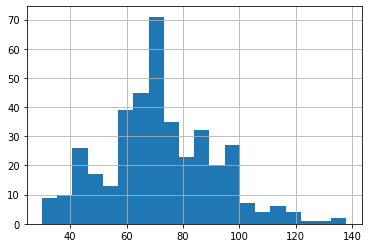

In [80]:
df[df.Style.str.contains(".*IPA", na=False)].IBUs.hist(bins=20)

## Hm, Interesting distribution. List all of the beers with IBUs above the 75th percentile

- *Tip: There's a single that gives you the 25/50/75th percentile*
- *Tip: You can just manually type the number when you list those beers*

In [73]:
df[df.Style.str.contains(".*IPA", na=False)].rank(pct=True)

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,0.334501,0.618214,0.626970,0.556042,0.796848,0.037500,0.142857
6,0.172504,0.038529,0.573555,0.092820,0.796848,0.823214,0.415816
14,0.770578,0.038529,0.573555,0.092820,0.796848,0.785714,0.415816
17,0.719790,0.038529,0.573555,0.556042,0.796848,0.180357,0.349490
24,0.381786,0.556918,0.774081,0.092820,0.796848,0.823214,0.910714
25,0.828371,0.556918,0.774081,0.556042,0.796848,0.760714,0.764031
27,0.380035,0.556918,0.774081,0.092820,0.796848,0.823214,0.910714
33,0.954466,0.355517,0.796848,0.556042,0.309982,0.303571,0.061224
38,0.462347,0.200525,0.207531,0.556042,0.796848,0.791964,NaN
39,0.133100,0.200525,0.207531,0.092820,0.796848,0.978571,NaN


## List all of the beers with IBUs below the 25th percentile

## List the median IBUs of each type of beer. Graph it.

Put the highest at the top, and the missing ones at the bottom.

- Tip: Look at the options for `sort_values` to figure out the `NaN` thing. The `?` probably won't help you here.

## Hmmmm, it looks like they are generally different styles. What are the most common 5 styles of high-IBU beer vs. low-IBU beer?

- *Tip: You'll want to think about it in three pieces - filtering to only find the specific beers beers, then finding out what the most common styles are, then getting the top 5.*
- *Tip: You CANNOT do this in one command. It's going to be one command for the high and one for the low.*
- *Tip: "High IBU" means higher than 75th percentile, "Low IBU" is under 25th percentile*

## Get the average IBU of "Witbier", "Hefeweizen" and "American Pale Wheat Ale" styles

I'm counting these as wheat beers. If you see any other wheat beer categories, feel free to include them. I want ONE measurement and ONE graph, not three separate ones. And 20 to 30 bins in the histogram, please.

- *Tip: I hope that `isin` is in your toolbox*

## Draw a histogram of the IBUs of those beers

## Get the average IBU of any style with "IPA" in it (also draw a histogram)

## Plot those two histograms on top of one another

To plot two plots on top of one another, you do two steps.

1. First, you make a plot using `plot` or `hist`, and you save it into a variable called `ax`.
2. You draw your second graph using `plot` or `hist`, and send `ax=ax` to it as a parameter.

It would look something like this:

```python
ax = df.plot(....)
df.plot(ax=ax, ....)
``` 

(...except totally different)

## Compare the ABV of wheat beers vs. IPAs : their IBUs were really different, but how about their alcohol percentage?

Wheat beers might include witbier, hefeweizen, American Pale Wheat Ale, and anything else you think is wheaty. IPAs probably have "IPA" in their name.

## Good work!

If you made it this far you deserve a drink.